In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [2]:
raw_tracking_data = pd.read_csv("tracking_week_1.csv")


In [3]:
tracking_data = raw_tracking_data[raw_tracking_data['displayName'] != 'football']
tracking_data['tackle_label'] = tracking_data.groupby(['playId','gameId','frameId'])['event'].transform(lambda x: int(any(event == 'tackle' for event in x)))



C:\Users\akash\AppData\Local\Temp\ipykernel_28664\4212027857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracking_data['tackle_label'] = tracking_data.groupby(['playId','gameId','frameId'])['event'].transform(lambda x: int(any(event == 'tackle' for event in x)))


In [4]:
import numpy as np

def reverse_deg(deg):
    if deg < 180:
        return deg + 180
    if deg >= 180:
        return deg - 180


In [5]:
tracking_data["o_standard"]=np.where(tracking_data["playDirection"] == "left", tracking_data["o"].apply(reverse_deg), tracking_data["o"])

tracking_data["dir_standard"] = np.where(tracking_data["playDirection"] == "left", tracking_data["dir"].apply(reverse_deg), tracking_data["dir"])

tracking_data["x_standard"] = np.where(tracking_data["playDirection"] == "left", tracking_data["x"].apply(lambda x: 120 - x), tracking_data["x"])

tracking_data["y_standard"] =np.where(tracking_data["playDirection"] == "left",  tracking_data["y"].apply(lambda y: 160/3 - y), tracking_data["y"])


C:\Users\akash\AppData\Local\Temp\ipykernel_28664\215362370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracking_data["o_standard"]=np.where(tracking_data["playDirection"] == "left", tracking_data["o"].apply(reverse_deg), tracking_data["o"])
C:\Users\akash\AppData\Local\Temp\ipykernel_28664\215362370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracking_data["dir_standard"] = np.where(tracking_data["playDirection"] == "left", tracking_data["dir"].apply(reverse_deg), tracking_data["dir"])
C:\U

In [6]:
plays = pd.read_csv("plays.csv")


In [7]:
merged_data = pd.merge(plays, tracking_data, on=['gameId', 'playId'])


In [8]:
# Calculate acceleration in x-direction
merged_data['acceleration_x'] = merged_data['a'] * np.cos(np.deg2rad(merged_data['dir_standard']))
# Calculate acceleration in y-direction
merged_data['acceleration_y'] = tracking_data['a'] * np.sin(np.deg2rad(merged_data['dir_standard']))


In [9]:
merged_data


,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,o,dir,event,tackle_label,o_standard,dir_standard,x_standard,y_standard,acceleration_x,acceleration_y
0,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,78.37,334.07,NaN,0,258.37,154.07,46.06,42.553333,-0.845369,0.502864
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,77.27,346.63,NaN,0,257.27,166.63,46.06,42.543333,-0.749131,0.141056
2,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,76.49,341.52,NaN,0,256.49,161.52,46.06,42.533333,-0.512155,0.155317
3,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,77.24,331.07,man_in_motion,0,257.24,151.07,46.07,42.523333,-0.201299,0.430529
4,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,77.24,330.85,NaN,0,257.24,150.85,46.08,42.513333,-0.122269,0.604001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346241,2022091200,3467,46189,Will Dissly,(6:08) G.Smith pass short right to W.Dissly to...,4,1,10,SEA,DEN,...,135.61,133.25,tackle,1,135.61,133.25,38.79,22.040000,-1.048330,1.194528
1346242,2022091200,3467,46189,Will Dissly,(6:08) G.Smith pass short right to W.Dissly to...,4,1,10,SEA,DEN,...,130.48,133.47,NaN,0,130.48,133.47,39.03,21.800000,-1.183316,1.110374
1346243,2022091200,3467,46189,Will Dissly,(6:08) G.Smith pass short right to W.Dissly to...,4,1,10,SEA,DEN,...,130.48,132.53,NaN,0,130.48,132.53,39.28,21.580000,-1.230277,0.655862
1346244,2022091200,3467,46189,Will Dissly,(6:08) G.Smith pass short right to W.Dissly to...,4,1,10,SEA,DEN,...,127.24,131.21,NaN,0,127.24,131.21,39.52,21.380000,-1.238583,0.571748


In [10]:
def create_heatmap(data, feature, size=(120, 53)):
    heatmap = np.zeros(size)
    for _, row in data.iterrows():
        x = min(int(row['x']), size[0] - 1)
        y = min(int(row['y']), size[1] - 1)
        heatmap[x, y] += int(row[feature]) if feature in row and pd.notnull(row[feature]) else 0
    return MinMaxScaler().fit_transform(heatmap)


In [11]:
def generate_multi_channel_heatmaps(df, game_id, play_id,frame_id, tracking_data):
    player_data = df[(df['gameId'] == game_id) & (df['playId'] == play_id)& (df['frameId'] == frame_id)]
    features = ['acceleration_x', 'acceleration_y', 's','dis']
    ball_features = ['a', 's','dis']
    heatmaps = []

    offense_data = player_data[(player_data['possessionTeam'] == player_data['club']) & (player_data['nflId'] != player_data['ballCarrierId'])]
    defense_data = player_data[player_data['defensiveTeam'] == player_data['club']]
    ball_carrier_data = player_data[player_data['nflId'] == player_data['ballCarrierId']]
    ball_data = tracking_data[(tracking_data['gameId'] == game_id) & (tracking_data['playId'] == play_id) & (tracking_data['frameId'] == frame_id)   & (tracking_data['displayName'] == 'football')]



    for feature in features:

        heatmaps.append(create_heatmap(defense_data, feature))
        heatmaps.append(create_heatmap(offense_data, feature))
        heatmaps.append(create_heatmap(ball_carrier_data, feature))

    for feature in ball_features:
        heatmaps.append(create_heatmap(ball_data, feature))


    print("*******End generate_multi_channel_heatmaps*******")
    return np.stack(heatmaps, axis=-1)


In [12]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_heatmaps = []
y_labels = []

selected_gameIds = merged_data['gameId'].unique()[:50]

unique_combinations = merged_data[merged_data['gameId'].isin(selected_gameIds)].groupby(['gameId', 'playId','frameId']).size().reset_index(name='count')
print(selected_gameIds)
print("Unique combinations: ", len(unique_combinations))
count = 1
for gameId in selected_gameIds:
    game_data = merged_data[merged_data['gameId'] == gameId]

    for (gameId,play_id,frame_id), group in game_data.groupby(['gameId','playId','frameId']):
        heatmaps = generate_multi_channel_heatmaps(merged_data, gameId,play_id,frame_id,raw_tracking_data)
        X_heatmaps.append(heatmaps)
        y_labels.append(group['tackle_label'].iloc[0])
        print(count)
        count +=1
X_heatmaps = np.array(X_heatmaps)
y_labels = np.array(y_labels)

y_labels_encoded = to_categorical(y_labels)

X_train, X_test, y_train, y_test = train_test_split(X_heatmaps, y_labels_encoded, test_size=0.2, random_state=42)



[2022091103 2022091111 2022091112 2022091102 2022091109 2022091107
 2022091100 2022091104 2022091108 2022091106 2022091200 2022091105
 2022091113 2022090800 2022091110 2022091101]
Unique combinations:  61193
*******End generate_multi_channel_heatmaps*******
1
*******End generate_multi_channel_heatmaps*******
2
*******End generate_multi_channel_heatmaps*******
3
*******End generate_multi_channel_heatmaps*******
4
*******End generate_multi_channel_heatmaps*******
5
*******End generate_multi_channel_heatmaps*******
6
*******End generate_multi_channel_heatmaps*******
7
*******End generate_multi_channel_heatmaps*******
8
*******End generate_multi_channel_heatmaps*******
9
*******End generate_multi_channel_heatmaps*******
10
*******End generate_multi_channel_heatmaps*******
11
*******End generate_multi_channel_heatmaps*******
12
*******End generate_multi_channel_heatmaps*******
13
*******End generate_multi_channel_heatmaps*******
14
*******End generate_multi_channel_heatmaps*******
15
*****

KeyboardInterrupt: 

In [ ]:
import numpy as np

# Specify the file path to save the data
file_path = "X_heatmaps.npy"

# Save the X_heatmaps data to the file
np.save(file_path, X_heatmaps)


In [14]:
X_heatmaps = np.array(X_heatmaps)
y_labels = np.array(y_labels)

y_labels_encoded = to_categorical(y_labels)

X_train, X_test, y_train, y_test = train_test_split(X_heatmaps, y_labels_encoded, test_size=0.2, random_state=42)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 118, 51, 32)       4352      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 59, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 57, 23, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 28, 11, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 19712)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

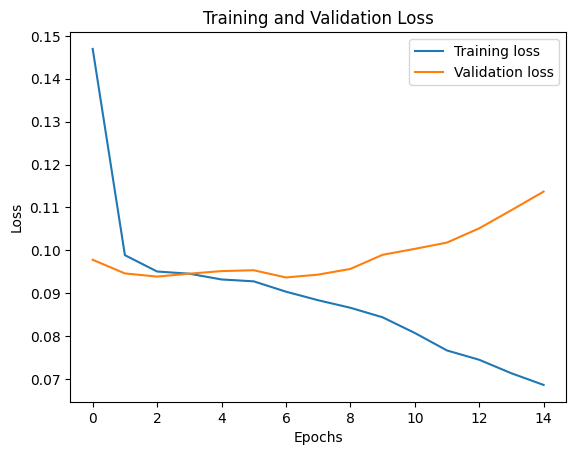

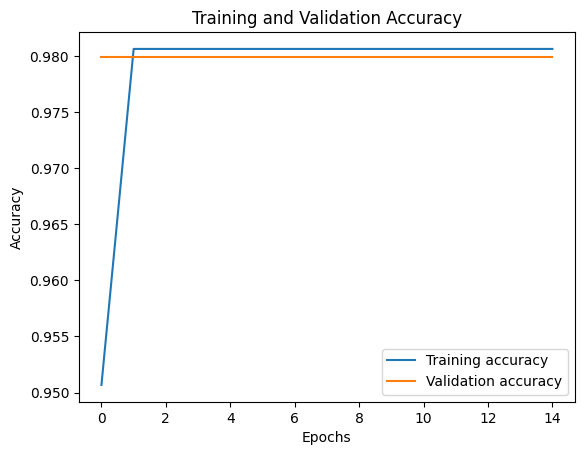

In [18]:
from keras.models import Model
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, concatenate, Dropout
def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
input_shape = X_train.shape[1:]
model = build_cnn_model(input_shape)
model.summary()
from keras.callbacks import History
import matplotlib.pyplot as plt
history = model.fit(X_train, y_train, batch_size=1000, epochs=15, validation_split=0.1)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()